## Imports

In [50]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

In [51]:
def cls_feature(X,max_cat = 10):
        #Agrupando features numéricas
    numeric_features  = [cls for cls in X.columns if X[cls].dtype == 'float64' or X[cls].dtype =='int64']
    # print('>>numeric_features:', numeric_features ,
          # len(numeric_features))


    #Agrupando features categoricas
    categorical_features = [cls for cls in X.columns if X[cls].dtypes == 'object' and X[cls].nunique()<=max_cat]
    # print('\n>>cat_features:', cat_features ,
          # len(cat_features))
    return numeric_features , categorical_features

In [52]:

def stratified_cross_validation(X, y, model, n_splits=5, random_state=None):
    """
    Realiza validação cruzada com estratificação.
    
    Parâmetros:
        - X: matriz de características.
        - y: vetor de rótulos das classes.
        - model: modelo de machine learning a ser avaliado.
        - n_splits: número de divisões (folds) para a validação cruzada (padrão: 5).
        - random_state: semente para reprodução dos resultados (padrão: None).
    
    Retorna:
        - scores: uma lista contendo as métricas de desempenho obtidas para cada fold.
    """
    skf = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    scores = []
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        accuracy_scores.append(accuracy)
        roc_auc_scores.append(roc_auc)
        f1_scores.append(f1)
    
    return accuracy_scores, roc_auc_scores, f1_scores


## Start

In [108]:
df_train = pd.read_csv('data/atual_train.csv')
df_test = pd.read_csv('data/test.csv')

In [109]:
df = df_train.drop(columns='id_do_caso');df.head(12)

,continente,educacao_do_empregado,tem_experiencia_de_trabalho,requer_treinamento_de_trabalho,num_de_empregados,ano_de_estabelecimento,regiao_de_emprego,salario_prevalecente,unidade_de_salario,posicao_em_tempo_integral,status_do_caso,cat_empresa,cat_salario,cat_experiencia
0,Europa,Ensino Médio,N,S,2087,1855,Sul,69711.2400,Ano,1,0,antiga,medio_baixo,3
1,Ásia,Mestrado,S,N,5991,2003,Meio-Oeste,52931.3800,Ano,1,1,nova,medio_baixo,2
2,Ásia,Ensino Médio,N,N,1426,2000,Ilha,110830.2100,Ano,1,0,nova,alto,4
3,Ásia,Ensino Médio,N,N,3846,1992,Meio-Oeste,91884.6800,Semana,1,0,intermediaria,medio_alto,4
4,Ásia,Ensino Superior,S,N,3957,1949,Nordeste,138155.2400,Ano,1,1,intermediaria,alto,2
5,Ásia,Mestrado,S,N,2374,1998,Oeste,129632.2700,Ano,0,1,nova,alto,2
6,Ásia,Mestrado,S,N,496,1998,Nordeste,111491.3900,Ano,1,1,nova,alto,2
7,América do Sul,Ensino Superior,N,N,631,1999,Sul,547.0719,Hora,1,0,nova,baixo,4
8,Ásia,Mestrado,N,N,5795,2000,Nordeste,136521.7200,Ano,1,1,nova,alto,4
9,Ásia,Mestrado,S,N,70,2010,Oeste,69027.5600,Ano,1,1,nova,medio_baixo,2


In [110]:
df['status_do_caso'].value_counts()

1    11937
0     5899
Name: status_do_caso, dtype: int64

/opt/anaconda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status_do_caso', ylabel='count'>

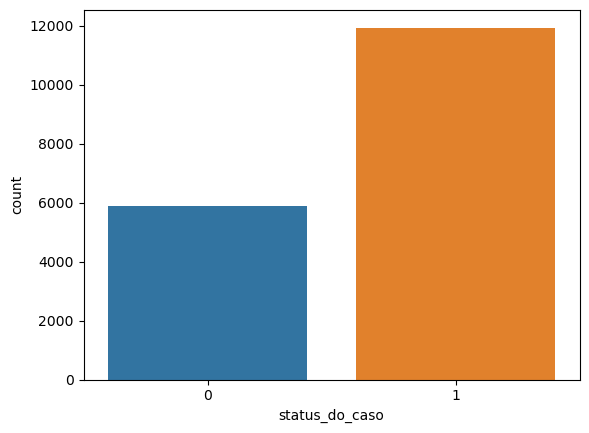

In [111]:
sns.countplot(df['status_do_caso'])

In [112]:
# Separar os dados em features (X) e target (y)
X = df.drop(columns='status_do_caso')  # Substitua 'target_column' pelo nome da coluna alvo
y = df['status_do_caso']

In [113]:
numeric_features, categorical_features = cls_feature(X)

In [114]:
numeric_features

['num_de_empregados',
 'ano_de_estabelecimento',
 'salario_prevalecente',
 'posicao_em_tempo_integral',
 'cat_experiencia']

In [115]:
categorical_features

['continente',
 'educacao_do_empregado',
 'tem_experiencia_de_trabalho',
 'requer_treinamento_de_trabalho',
 'regiao_de_emprego',
 'unidade_de_salario',
 'cat_empresa',
 'cat_salario']

In [116]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.7,random_state=42)

In [117]:
# Pipeline para pré-processamento das variáveis numéricas
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline para pré-processamento das variáveis categóricas
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# Combinando os pipelines de pré-processamento
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

In [118]:
# Seu modelo de classificação
model = RandomForestClassifier(n_estimators=200)

# Pipeline completo com pré-processamento e modelo de classificação
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", model)
])

In [119]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['num_de_empregados',
                                                   'ano_de_estabelecimento',
                                                   'salario_prevalecente',
                                                   'posicao_em_tempo_integral',
                                                   'cat_experiencia']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                      

In [120]:
y_pred = pipeline.predict(X_valid);
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [122]:
# Calcular o AUC-ROC
auc_roc = roc_auc_score(y_valid, y_pred)
auc_roc

0.6550542820335002

In [123]:
# Calcular o F1-score
f1 = f1_score(y_valid, y_pred)
f1

0.7956701857543766

In [124]:
from sklearn.metrics import classification_report
# Obter relatório de classificação
classification_report = classification_report(y_valid, y_pred)

print("Relatório de Classificação:")
print(classification_report)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.57      0.49      0.53      1739
           1       0.77      0.82      0.80      3612

    accuracy                           0.71      5351
   macro avg       0.67      0.66      0.66      5351
weighted avg       0.70      0.71      0.71      5351

